<a href="https://colab.research.google.com/github/Sampada-malagi/SampadaMalagi.github.io/blob/main/3DVSS_CNN_Handson_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import torch

In [3]:
torch.manual_seed(42)

## Pytorch basics

### Tensors

In [4]:
x = torch.tensor([[2., 3, 4], [5, 6, 7]])
x

tensor([[2., 3., 4.],
        [5., 6., 7.]])

### Autograd

$ y = mx + c $

$ \frac{dy}{dx} = m $

$ \frac{dy}{dm} = x $

$ \frac{dy}{dc} = 1 $

In [5]:
x = torch.tensor(10., requires_grad = True)

m = torch.tensor(3., requires_grad = True)
c = torch.tensor(2., requires_grad = True)

y = m*x + c
print(y)

y.backward()

print(x.grad)
print(m.grad)
print(c.grad)

tensor(32., grad_fn=<AddBackward0>)
tensor(3.)
tensor(10.)
tensor(1.)


## Deep Learning with CNN

### Data Loaders

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [6]:
import matplotlib.pyplot as plt

In [7]:
from torch.utils.data import TensorDataset, DataLoader

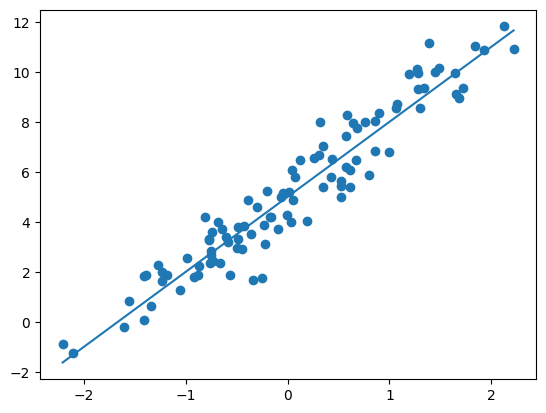

In [8]:
m = 3
c = 5

X = torch.sort(torch.randn(100))[0].float().unsqueeze(1)
Y = m * X.squeeze() + c + torch.normal(mean = torch.tensor(0.).repeat(100), std = torch.tensor(1.).repeat(100))

plt.scatter(X, Y)
plt.plot(X, m*X + c)
plt.show()

In [9]:
# Create a TensorDataset
dataset = TensorDataset(X, Y)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)
for x, y in dataloader:
    print(x.shape, y.shape)

torch.Size([16, 1]) torch.Size([16])
torch.Size([16, 1]) torch.Size([16])
torch.Size([16, 1]) torch.Size([16])
torch.Size([16, 1]) torch.Size([16])
torch.Size([16, 1]) torch.Size([16])
torch.Size([16, 1]) torch.Size([16])
torch.Size([4, 1]) torch.Size([4])


### Neural network

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#### Defining the model architecture

In [11]:
# Defining model class
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.layer = nn.Linear(1, 1)

    def forward(self, x):
        return self.layer(x)

In [12]:
# Instantiate the model
model = LinearRegression()
print(model)

LinearRegression(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


#### Defining loss functions

In [13]:
# Mean Squared Error Loss
criterion = nn.MSELoss()

#### Choosing optimizer

In [14]:
# Stochastic Gradient Descent
optimizer = optim.SGD(model.parameters(), lr=0.01)

#### Training the model

In [15]:
# Epochs
num_epochs = 100

In [28]:
history = []

for epoch in range(num_epochs):
    for inputs, labels in dataloader:

        # Forward propagate
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs.squeeze(), labels)
        history.append(loss.item())

        # Set the gradients to zero
        optimizer.zero_grad()

        # Backpropagate
        loss.backward()

        # Optimize (update weights)
        optimizer.step()

    # Print every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.2418
Epoch [20/100], Loss: 0.2418
Epoch [30/100], Loss: 0.2418
Epoch [40/100], Loss: 0.2418
Epoch [50/100], Loss: 0.2418
Epoch [60/100], Loss: 0.2418
Epoch [70/100], Loss: 0.2418
Epoch [80/100], Loss: 0.2418
Epoch [90/100], Loss: 0.2418
Epoch [100/100], Loss: 0.2418


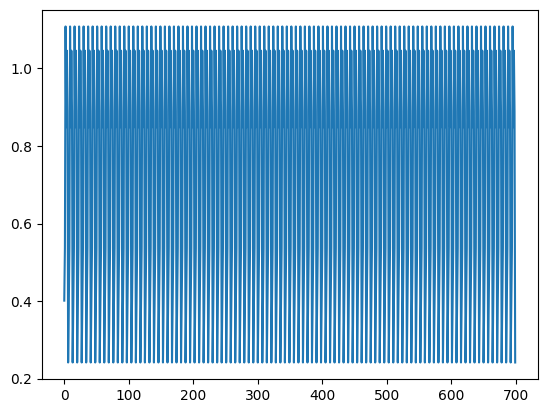

In [29]:
plt.plot(history)
plt.show()

#### Make predictions

Y_pred shape = torch.Size([100, 1])


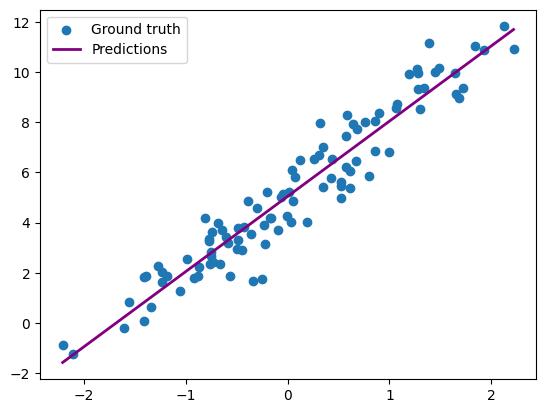

In [25]:
with torch.no_grad():
    Y_pred = model(X)
    print(f"Y_pred shape = {Y_pred.shape}")
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, c = 'purple', linewidth=2)
    plt.legend(['Ground truth', 'Predictions'])
    plt.show()

#### Evaluate

In [ ]:
# Code here


#### Visualize model weights![torch.Conv2d_shape.png](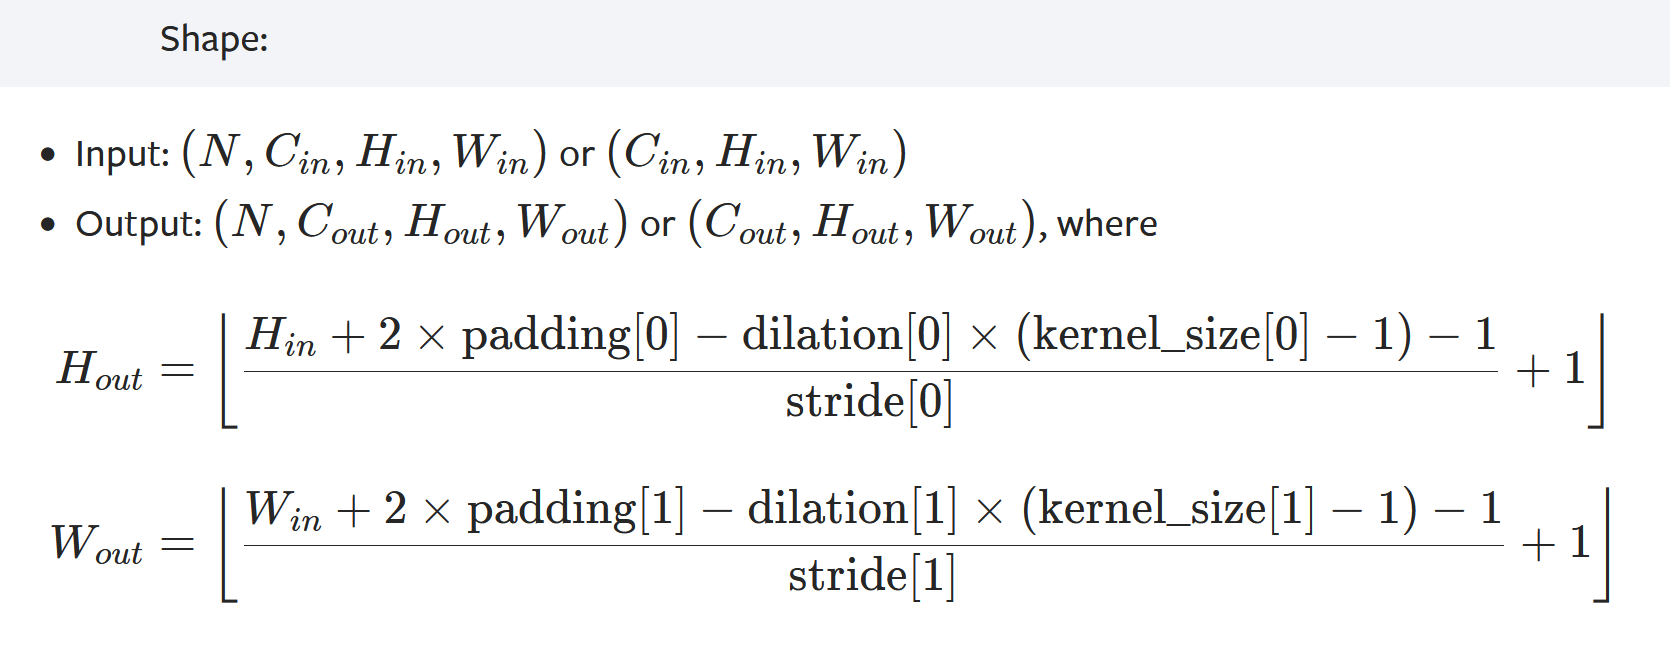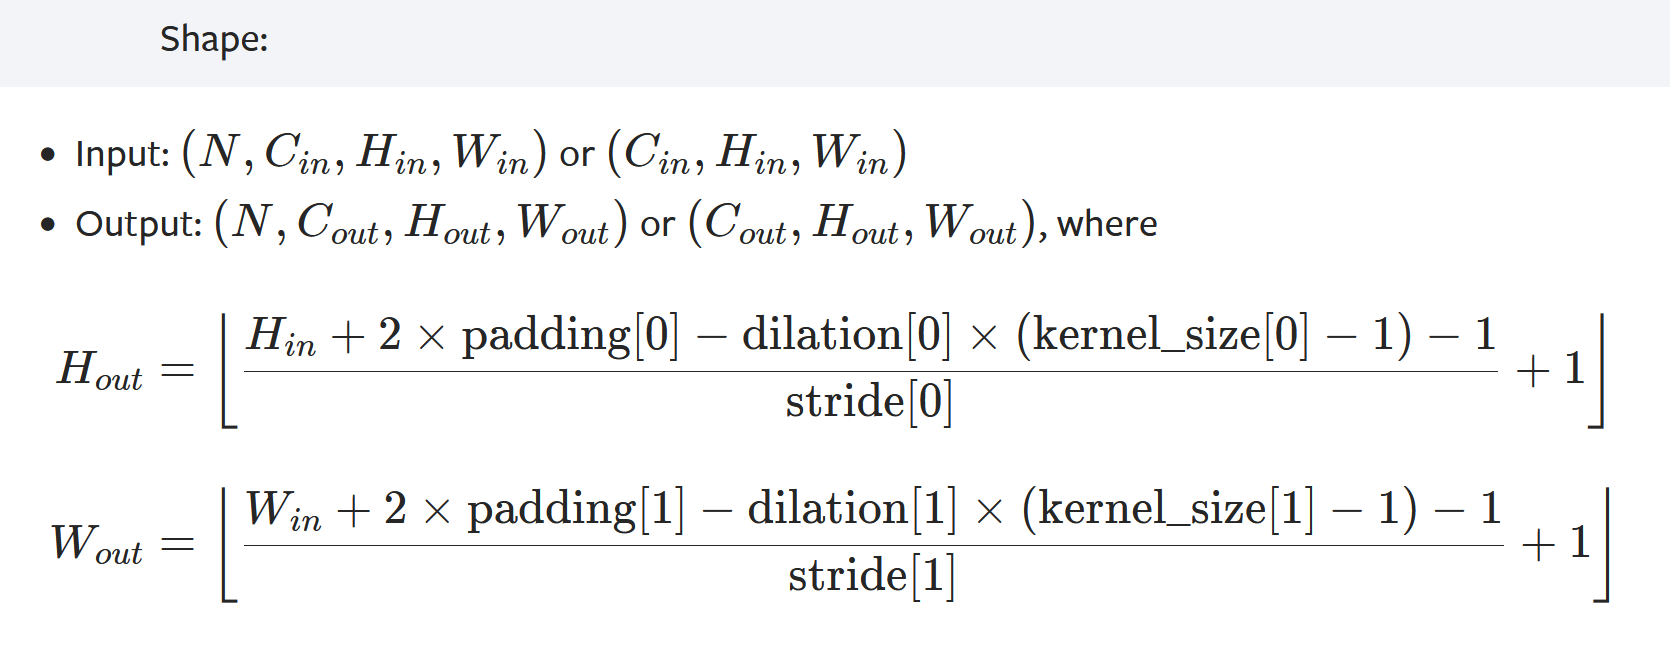)

In [30]:
print(f'm = {m}, c = {c}')
print("Model:", model.state_dict())


m = 3, c = 5
Model: OrderedDict([('layer.weight', tensor([[2.9972]])), ('layer.bias', tensor([5.0433]))])


#### Save and load models

In [31]:
torch.save(model.state_dict(), 'LinearRegressor_statedict.pth')

In [32]:
model = LinearRegression()
model.load_state_dict(torch.load('LinearRegressor_statedict.pth'))

<All keys matched successfully>

Alternative:

In [33]:
torch.save(model, 'LinearRegressor_model.pth')

In [34]:
model_new = torch.load('LinearRegressor_model.pth')
model_new

LinearRegression(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

### Convolutional Neural Network

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [35]:
!nvidia-smi

Sun May 26 10:48:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


#### Prepare Dataset

In [ ]:
import torchvision
import torchvision.transforms as transforms

https://pytorch.org/vision/main/transforms.html

In [ ]:
# Define transformations to apply to the data
transform = transforms.Compose([

    # Convert images to tensors
    transforms.ToTensor(),

    # Normalize the pixel values to the range [-1, 1]
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# Load MNIST data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform = transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform = transform)

print(train_dataset, "\n")
print(test_dataset)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           ) 

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

torch.Size([64, 1, 28, 28]) torch.Size([64])


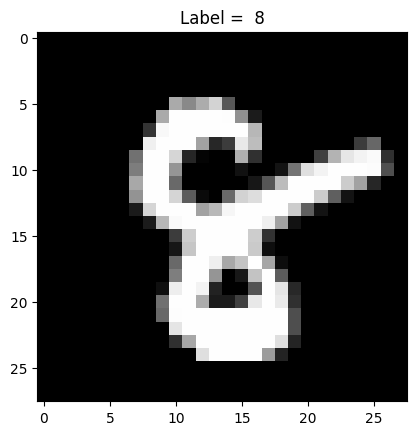

In [ ]:
plt.gray()
for x, y in train_loader:
    print(x.shape, y.shape)
    X_sample, Y_sample = x[0:1], y[0:1]
    X_batch, Y_batch = x, y
    plt.imshow(x[0].permute(1, 2, 0))
    plt.title("Label =  " + str(y[0].item()))
    plt.show()
    break

#### Defining the model architecture

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # Output size is 10 for 10 classes (0-9)

    def forward(self, x):
        # Input shape: (batch_size, 1, 28, 28)
        x = F.relu(self.conv1(x))
        x = self.pool(x)  # Output shape: (batch_size, 32, 14, 14)
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # Output shape: (batch_size, 64, 7, 7)
        x = x.view(-1, 64 * 7 * 7)  # Flattening for fully connected layer

        x = self.fc1(x)
        x = F.relu(x)  # Output shape: (batch_size, 128)
        x = self.fc2(x)  # Output shape: (batch_size, 10)
        x = F.softmax(x, dim = 1)
        return x


In [ ]:
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
model.to(device)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
X_sample = X_sample.to(device)
Y_pred_sample = model(X_sample)
print(Y_pred_sample.shape)

X_batch = X_batch.to(device)
Y_pred_batch = model(X_batch)
print(Y_pred_batch.shape)

torch.Size([1, 10])
torch.Size([64, 10])


#### Training CNN Model

In [ ]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
num_epochs = 500

In [ ]:
history = []

for epoch in range(num_epochs):
    for inputs, labels in train_loader:

        # Take to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward propagate
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs.squeeze(), labels)
        history.append(loss.item())

        # Set the gradients to zero
        optimizer.zero_grad()

        # Backpropagate
        loss.backward()

        # Optimize (update weights)
        optimizer.step()
        break

    # Print every 10 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/500], Loss: 1.7446
Epoch [200/500], Loss: 1.6545
Epoch [300/500], Loss: 1.5818
Epoch [400/500], Loss: 1.4689
Epoch [500/500], Loss: 1.4625


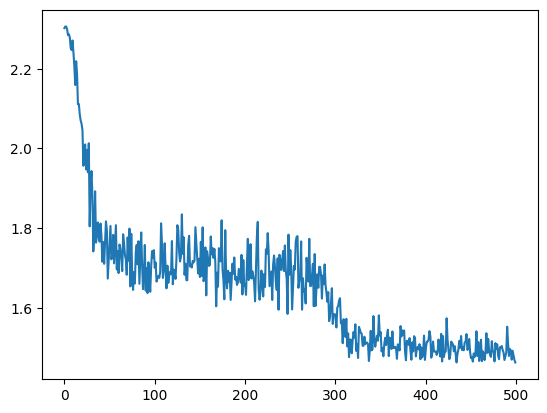

In [ ]:
plt.plot(history)

In [ ]:
next(model.parameters()).device

device(type='cpu')

In [ ]:
X_sample.device

device(type='cpu')

torch.Size([64, 1, 28, 28]) torch.Size([64])


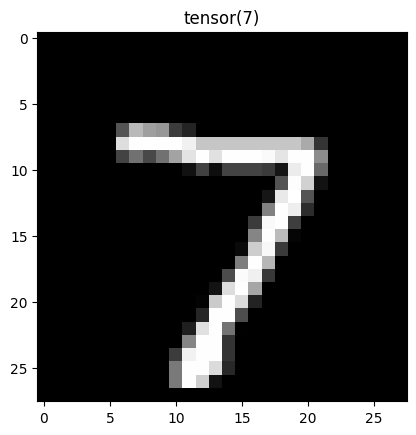

torch.Size([1, 10])
torch.Size([64, 10])


In [ ]:
plt.gray()
for x, y in test_loader:
    print(x.shape, y.shape)
    X_sample, Y_sample = x[0:1], y[0:1]
    X_batch, Y_batch = x, y
    plt.imshow(x[0].permute(1, 2, 0))
    plt.title(y[0])
    plt.show()
    break


X_sample = X_sample.to(device)
Y_pred_sample = model(X_sample)
print(Y_pred_sample.shape)

X_batch.to(device)

X_batch = X_batch.to(device)
Y_pred_batch = model(X_batch)
print(Y_pred_batch.shape)

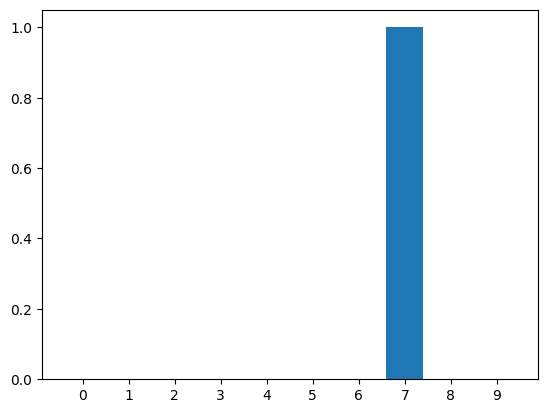

In [ ]:
plt.bar(torch.arange(10), Y_pred_sample[0].detach().cpu())
plt.xticks(torch.arange(10))
plt.show()

#### Save model

In [ ]:
torch.save(model, 'CNN.pth')

#### Evaluation

##### Show accuracy on train set

In [ ]:
# Write codes here

##### Show accuracy on test set

In [ ]:
# Write codes here

#### Exploring the model

![Conv2D Shape](images/torch.Conv2d_shape.png)

In [ ]:
conv1_out = model.conv1(X_sample)
conv1_pool_out = model.pool(conv1_out)

print("Conv1 layer outputs:", conv1_out.shape)
print("Conv1 layer outputs after pooling:", conv1_pool_out.shape, "\n")

Conv1 layer outputs: torch.Size([1, 32, 28, 28])
Conv1 layer outputs after pooling: torch.Size([1, 32, 14, 14]) 



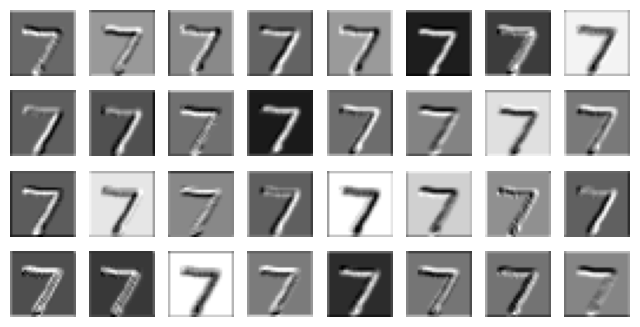

In [ ]:
plt.figure(figsize = (8, 4))

with torch.no_grad():
    for i in range(32):
        plt.subplot(4, 8, i+1)
        plt.imshow(conv1_out[0, i, :, :].cpu())
        plt.axis('off')

plt.show()

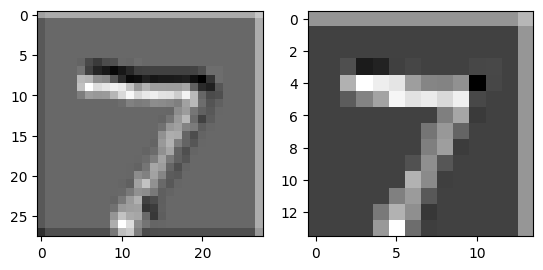

In [ ]:
with torch.no_grad():
  plt.subplot(1, 2, 1)
  plt.imshow(conv1_out[0, 0, :, :].cpu())

  plt.subplot(1, 2, 2)
  plt.imshow(conv1_pool_out[0, 0, :, :].cpu())

In [ ]:
conv2_out = model.conv2(conv1_pool_out)
conv2_pool_out = model.pool(conv2_out)

print("Conv2 layer outputs:", conv2_out.shape)
print("Conv2 layer outputs after pooling:", conv2_pool_out.shape, "\n")

# print(conv2_out[0])

Conv2 layer outputs: torch.Size([1, 64, 14, 14])
Conv2 layer outputs after pooling: torch.Size([1, 64, 7, 7]) 



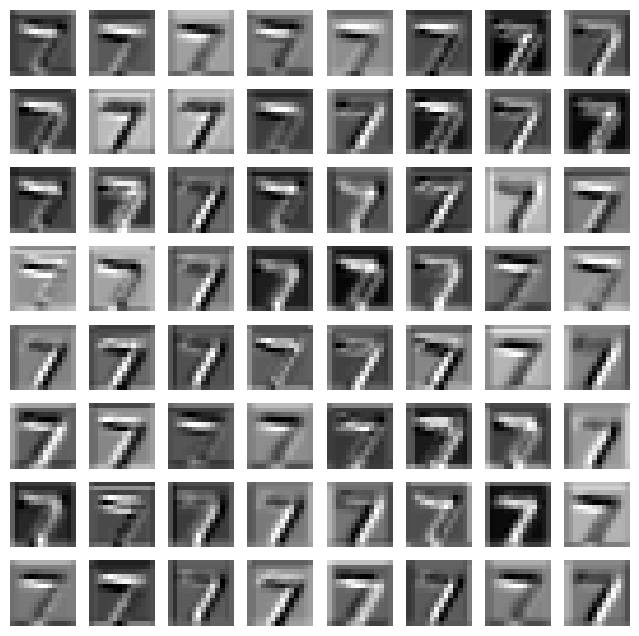

In [ ]:
plt.figure(figsize = (8, 8))

with torch.no_grad():
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(conv2_out[0, i, :, :].cpu())
        plt.axis('off')
plt.show()

In [ ]:
conv1_batch_out = model.conv1(X_batch)
conv1_batch_pool_out = model.pool(conv1_batch_out)

print("Conv1 layer outputs:", conv1_batch_out.shape)
print("Conv1 layer outputs after pooling:", conv1_batch_pool_out.shape, "\n")

Conv1 layer outputs: torch.Size([64, 32, 28, 28])
Conv1 layer outputs after pooling: torch.Size([64, 32, 14, 14]) 



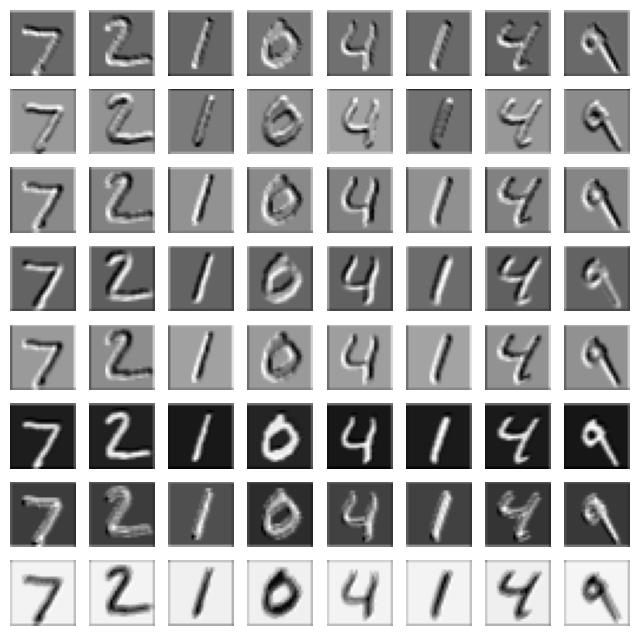

In [ ]:
with torch.no_grad():
  plt.figure(figsize = (8, 8))
  count = 1
  for i in range(8):
    for j in range(8):
      plt.subplot(8, 8, count)
      count+=1
      plt.imshow(conv1_batch_out[j, i, :, :].cpu())
      plt.axis('off')
  plt.show()

In [ ]:
#### To do: Display convolutions of inputs for layer 15

In [ ]:
# conv15_batch_out = CODE HERE
# conv15_batch_pool_out = CODE HERE

# print layer dimensions


In [ ]:
# with torch.no_grad():
#   plt.figure(figsize = (8, 8))
#   count = 1
#   for i in range(8):
#     for j in range(8):
#       plt.subplot(8, 8, count)
#       count+=1
#             ### CODE HERE
#       plt.axis('off')
#   plt.show()

In [ ]:
del model

### Transposed convolution

#### Define autoencoder model

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = Autoencoder()
model

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): Tanh()
  )
)

In [ ]:
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#### Train autoencoder

In [ ]:
num_epochs = 500

Epoch [100/500], Loss: 0.0168
Epoch [200/500], Loss: 0.0085
Epoch [300/500], Loss: 0.0068
Epoch [400/500], Loss: 0.0056
Epoch [500/500], Loss: 0.0048


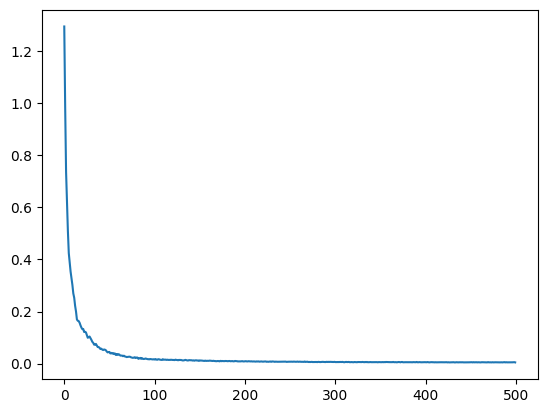

In [ ]:
history = []

for epoch in range(num_epochs):
    for inputs, labels in train_loader:

        inputs = inputs.to(device)

        # Forward propagate
        outputs = model(inputs)
        # Calculate loss
        loss = criterion(outputs, inputs)
        history.append(loss.item())

        # Set the gradients to zero
        optimizer.zero_grad()

        # Backpropagate
        loss.backward()

        # Optimize (update weights)
        optimizer.step()
        break

    # Print every 10 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(history)

torch.Size([64, 1, 28, 28]) torch.Size([64])


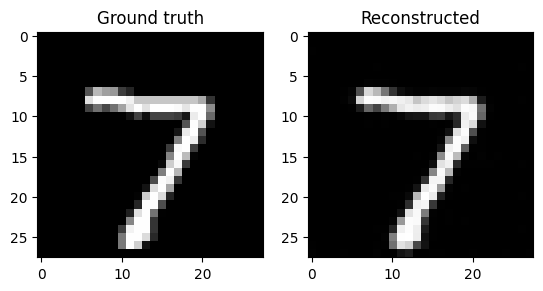

In [ ]:
plt.gray()
for x, y in test_loader:
    print(x.shape, y.shape)
    X_sample, Y_sample = x[0:1], y[0:1]
    X_batch, Y_batch = x, y
    break

X_sample = X_sample.to(device)
Y_pred_sample = model(X_sample)

with torch.no_grad():
  plt.subplot(1, 2, 1)
  plt.imshow(X_sample[0].permute(1, 2, 0))
  plt.title('Ground truth')



  plt.subplot(1, 2, 2)
  plt.imshow(Y_pred_sample[0].permute(1, 2, 0))
  plt.title('Reconstructed')
  plt.show()


In [ ]:
encoder_output = model.encoder(X_batch)
decoder_output = model.decoder(encoder_output)

print("Encoder outputs:", encoder_output.shape)
print("Decoder outputs:", decoder_output.shape)


Encoder outputs: torch.Size([64, 32, 7, 7])
Decoder outputs: torch.Size([64, 1, 28, 28])


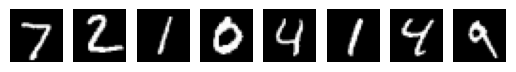

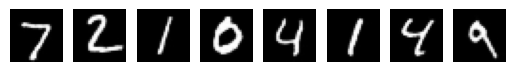

In [ ]:
with torch.no_grad():
  for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(X_batch[i, 0])
    plt.axis('off')
  plt.show()
  for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(decoder_output[i, 0, :, :])
    plt.axis('off')
  plt.show()

### Some useful concepts:
- Transposed convolution, unpooling [https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html https://pytorch.org/docs/stable/generated/torch.nn.MaxUnpool2d.html]
- Batch Normalization [https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html]
- 3D Convolutions [https://pytorch.org/docs/stable/generated/torch.nn.Conv3d.html]
- Gradient Accumulation [https://kozodoi.me/blog/20210219/gradient-accumulation]
- Dropout [https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html]

## Deep CNN

### AlexNet

![AlexNet](images/AlexNet_model_diagram.png)

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
print(model)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
from PIL import Image
from torchvision import transforms

In [ ]:
!wget https://github.com/pytorch/hub/raw/master/images/dog.jpg

--2024-05-26 09:16:05--  https://github.com/pytorch/hub/raw/master/images/dog.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg [following]
--2024-05-26 09:16:06--  https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 661378 (646K) [image/jpeg]
Saving to: ‘dog.jpg.2’

dog.jpg.2           100%[===================>] 645.88K  --.-KB/s    in 0.01s   

2024-05-26 09:16:06 (54.2 MB/s) - ‘dog.jpg.2’ saved [661378/661378]



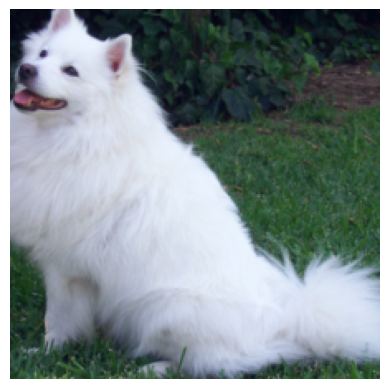

In [ ]:
filename = 'dog.jpg'
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

plt.imshow(((input_tensor - input_tensor.min())/(input_tensor.max() - input_tensor.min())).permute(1, 2, 0))
plt.axis('off')
plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-05-26 09:16:06--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.2’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-05-26 09:16:06 (79.4 MB/s) - ‘imagenet_classes.txt.2’ saved [10472/10472]



In [ ]:
probabilities = model(input_batch)
probabilities.shape

torch.Size([1, 1000])

In [ ]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

categories[:10]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [ ]:
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)

In [ ]:
for i in range(len(top5_prob[0])):
    print(categories[top5_catid[0,i]], top5_prob[0,i].item())

Samoyed 16.780479431152344
wallaby 14.582279205322266
Angora 13.929750442504883
Pomeranian 13.776115417480469
Persian cat 12.848082542419434


### VGGNet

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

-----

In [ ]:
model.features[0:2]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
)

In [ ]:
input_batch.shape

torch.Size([1, 3, 224, 224])

In [ ]:
conv1_out = model.features[0:2](input_batch)
conv1_pool_out = model.features[2](conv1_out)

print("Conv1 layer outputs:", conv1_out.shape)
print("Conv1 layer outputs after pooling:", conv1_pool_out.shape, "\n")

# print(conv1_out[0])

Conv1 layer outputs: torch.Size([1, 64, 224, 224])
Conv1 layer outputs after pooling: torch.Size([1, 64, 112, 112]) 



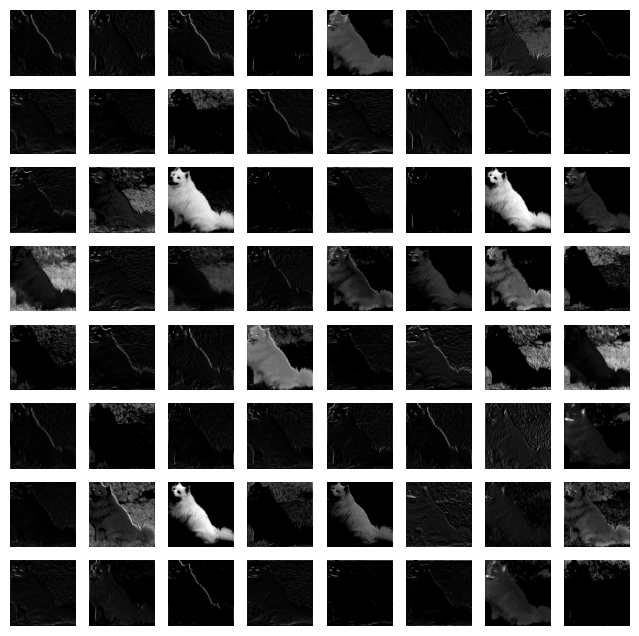

In [ ]:
plt.figure(figsize = (8, 8))

with torch.no_grad():
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(conv1_out[0, i, :, :])
        plt.axis('off')
#         plt.show()

In [ ]:
conv2_out = model.features[3:5](conv1_pool_out)
conv2_pool_out = model.features[5](conv2_out)

print("Conv2 layer outputs:", conv2_out.shape)
print("Conv2 layer outputs after pooling:", conv2_pool_out.shape, "\n")

# print(conv1_out[0])

Conv2 layer outputs: torch.Size([1, 128, 112, 112])
Conv2 layer outputs after pooling: torch.Size([1, 128, 56, 56]) 



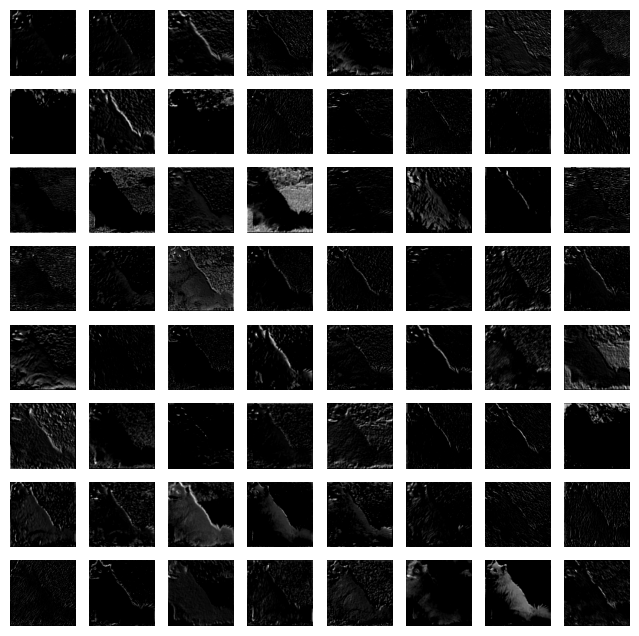

In [ ]:
plt.figure(figsize = (8, 8))

with torch.no_grad():
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(conv2_out[0, i, :, :])
        plt.axis('off')
#         plt.show()

In [ ]:
convx_out = model.features[0:16](input_tensor)
convx_pool_out = model.features[15:16](convx_out)

print("Conv layer outputs:", convx_out.shape)
print("Conv layer outputs after pooling:", convx_pool_out.shape, "\n")

# print(conv1_out[0])

Conv layer outputs: torch.Size([512, 14, 14])
Conv layer outputs after pooling: torch.Size([512, 7, 7]) 



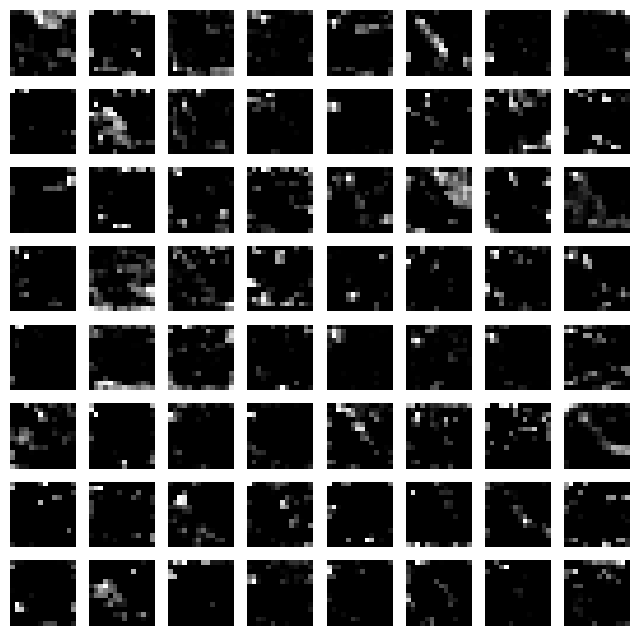

In [ ]:
plt.figure(figsize = (8, 8))

with torch.no_grad():
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(convx_out[i, :, :])
        plt.axis('off')
#         plt.show()

### Inception

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
model.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### ResNet

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
### Play around with various models

Thank you

[Anirban Mukherjee](https://www.linkedin.com/in/anirbanmukherjee1997/)

[Monjoy Narayan Choudhury](https://www.linkedin.com/in/monjoy-narayan-choudhury-a424b3200/)